# **Importing libraries**

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# **Objective 1**

**Question 1 - Reading training dataset from given link**

In [88]:
data = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv') #pandas reading function
data.head() #info of data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


**Question 2 - part a - variables usability**

Null values in DYRK1A_N : 0
Null values in ITSN1_N : 0
Null values in BDNF_N : 0
Null values in NR1_N : 0
Null values in NR2A_N : 0
Null values in pAKT_N : 0
Null values in pBRAF_N : 0
Null values in pCAMKII_N : 0
Null values in pCREB_N : 0
Null values in pELK_N : 0
Null values in pERK_N : 0
Null values in pJNK_N : 0
Null values in PKCA_N : 0
Null values in pMEK_N : 0
Null values in pNR1_N : 0
Null values in pNR2A_N : 0
Null values in pNR2B_N : 0
Null values in pPKCAB_N : 0
Null values in pRSK_N : 0
Null values in AKT_N : 0
Null values in BRAF_N : 0
Null values in CAMKII_N : 0
Null values in CREB_N : 0
Null values in ELK_N : 15
Null values in ERK_N : 0
Null values in GSK3B_N : 0
Null values in JNK_N : 0
Null values in MEK_N : 4
Null values in TRKA_N : 0
Null values in RSK_N : 0
Null values in APP_N : 0
Null values in Bcatenin_N : 15
Null values in SOD1_N : 0
Null values in MTOR_N : 0
Null values in P38_N : 0
Null values in pMTOR_N : 0
Null values in DSCR1_N : 0
Null values in AMPKA_N :

<AxesSubplot:>

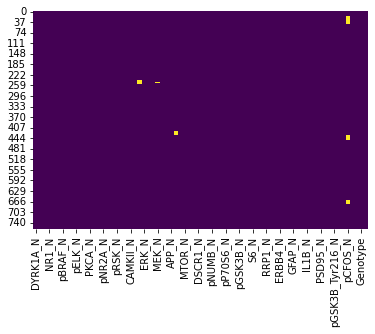

In [89]:
indx = []
#replacing blanks with nan values
for col in data.columns:
    data[col].replace({'?':np.nan},inplace=True)
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
#calculating null values sum from each column
for i in range(len(data.isnull().sum())):
  print(f'Null values in {data.columns[i]} :',data.isnull().sum()[i])
  #appending greater than 100 missing values column index
  if data.isnull().sum()[i] > 100:
    indx.append(i)
print(indx)
#dropping columns in indx variable
data.drop(data.columns[indx], axis=1,inplace=True)
data.info()
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')


As you can see some features has many missing values nearly 150-200, so we set threshold of 100 missing values per feature, above this threshold all the features will be removed.

**Question 2 - Part b - significant correlation among variables ?** \\
yes, between some variables there is significant correlation.

<AxesSubplot:>

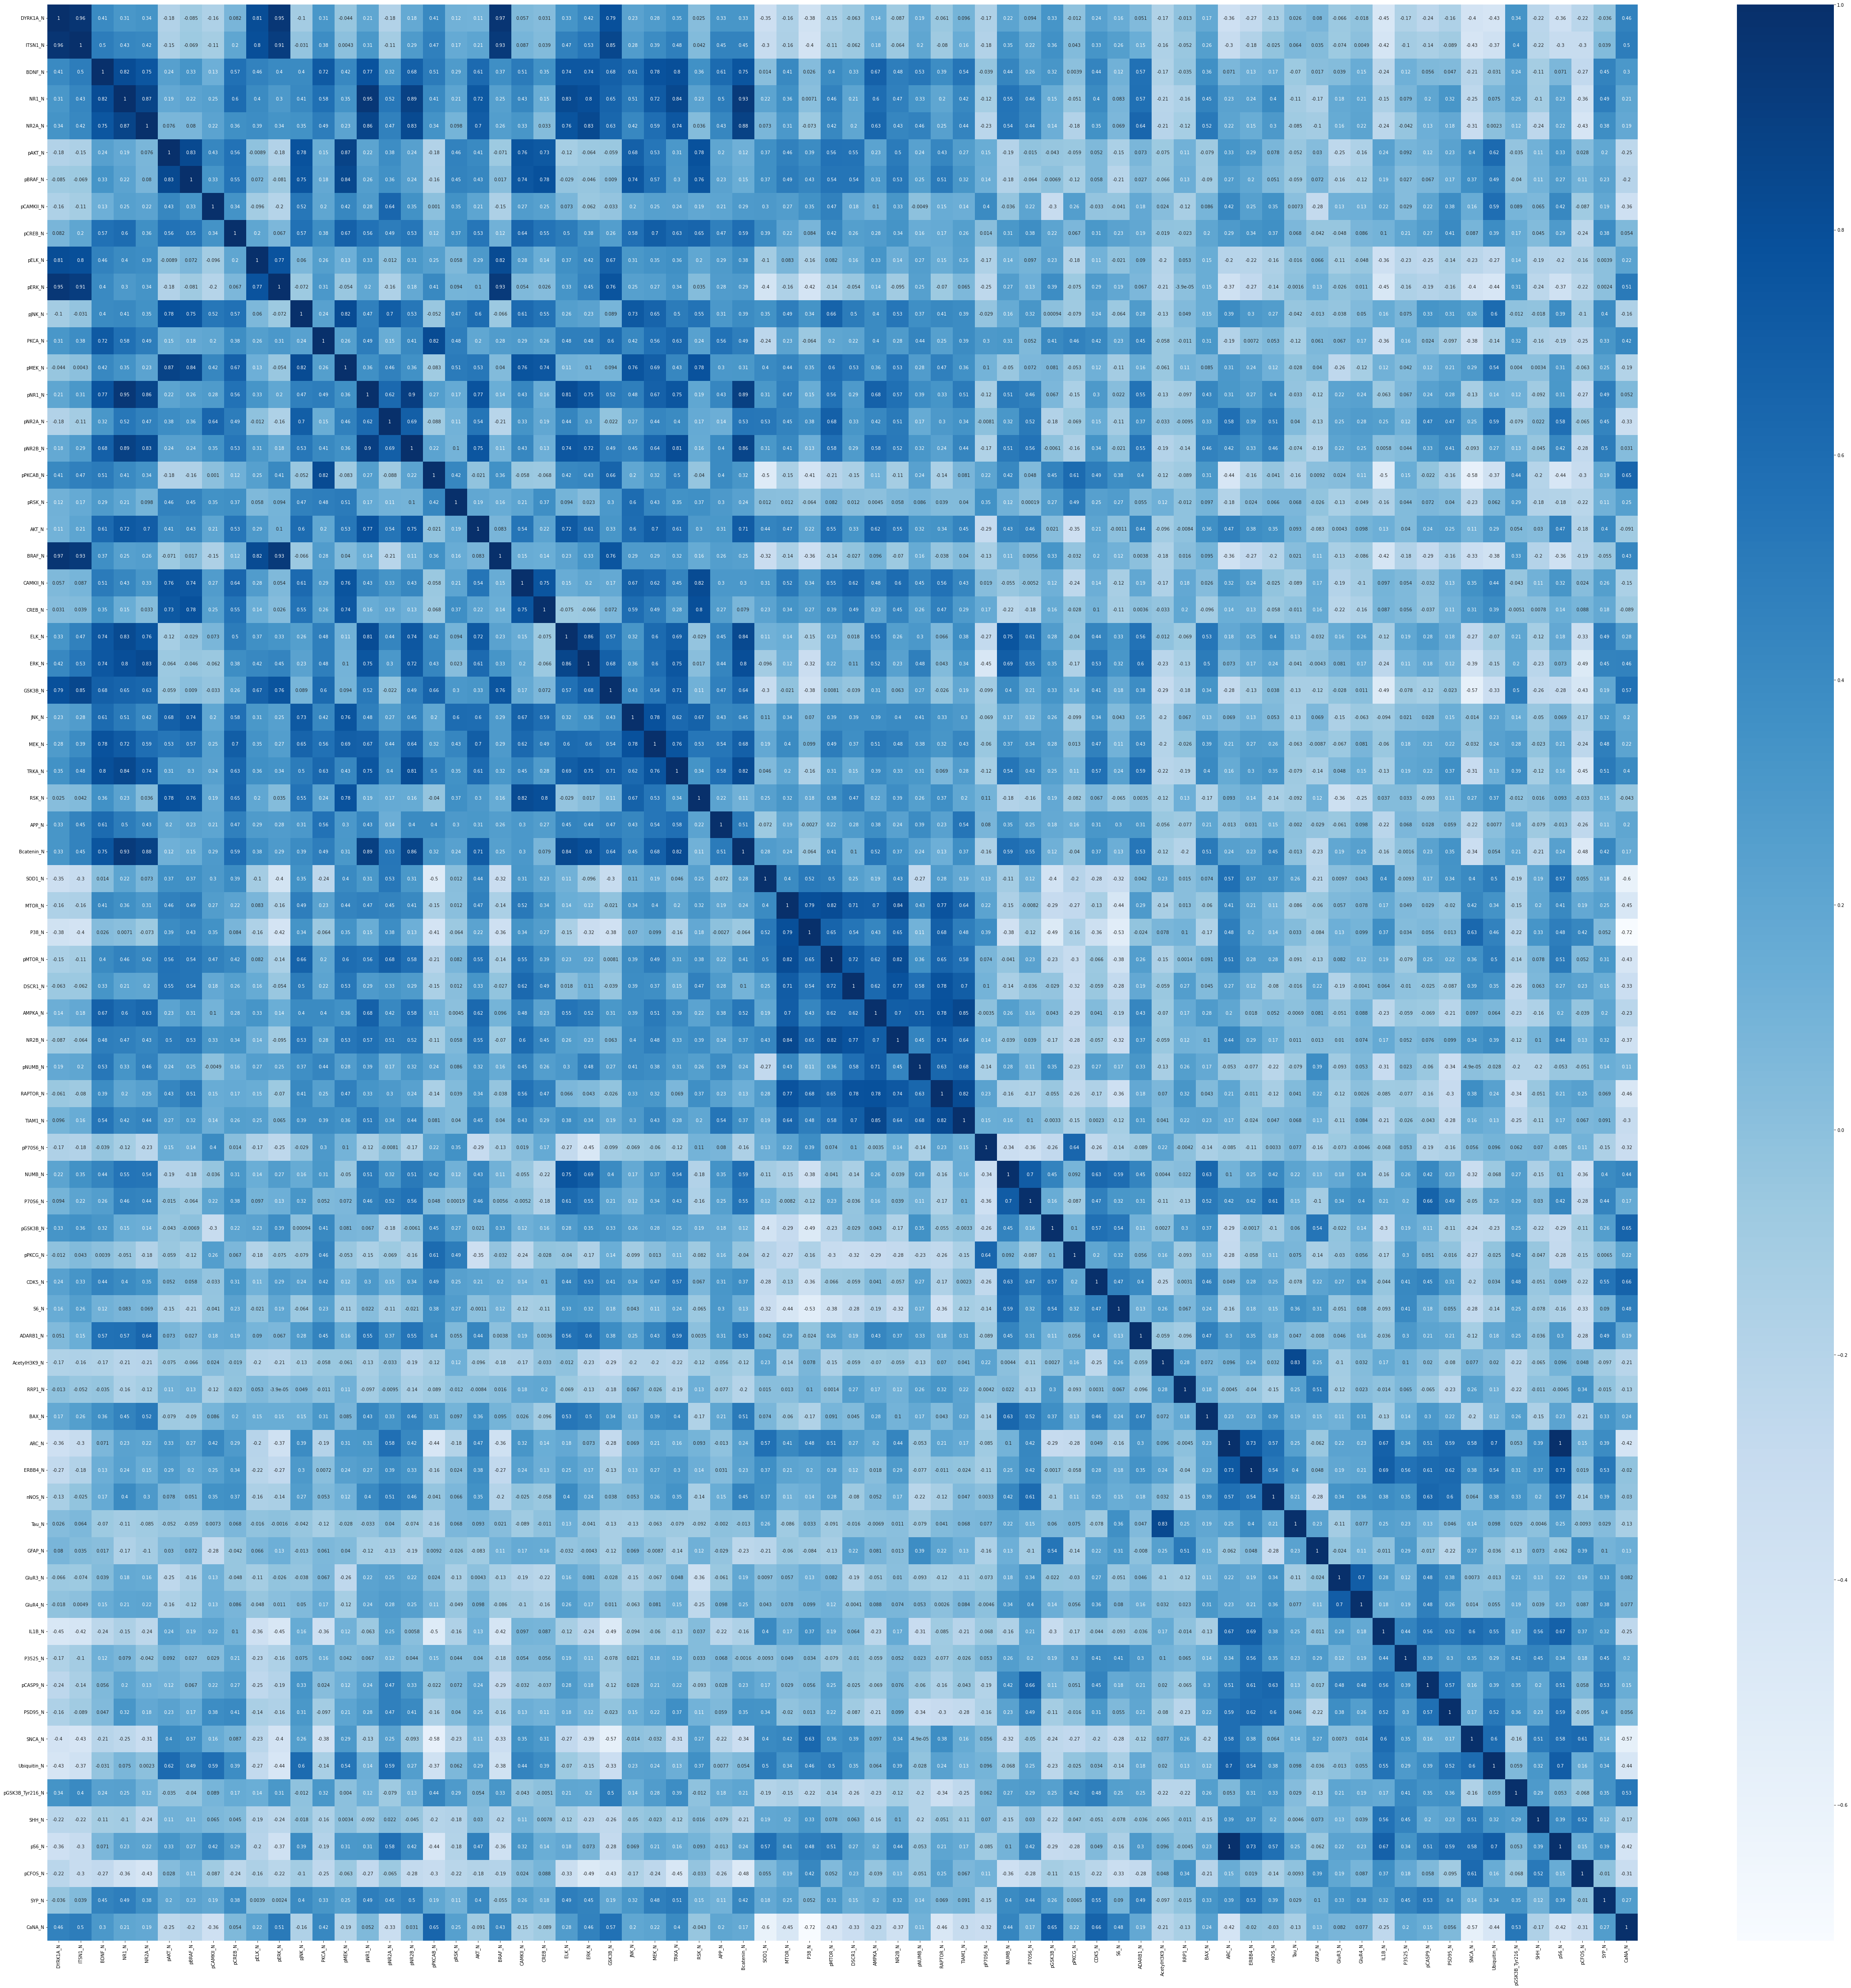

In [90]:
plt.figure(figsize=(79,79))
#sns heatmap showing correlation among different variables
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

In [91]:
corr = data.corr()
col = corr.columns
#dropping columns with very high correlation
for j in range(len(col)):
  for i in range(len(col)):
    if 1 > corr.iloc[j,i] >= 0.94 :
      print(corr.columns[j],corr.columns[i])
data.drop(['ITSN1_N','pERK_N','BRAF_N' ,'pNR1_N'], axis=1, inplace=True)
data.info()

DYRK1A_N ITSN1_N
DYRK1A_N pERK_N
DYRK1A_N BRAF_N
ITSN1_N DYRK1A_N
NR1_N pNR1_N
pERK_N DYRK1A_N
pNR1_N NR1_N
BRAF_N DYRK1A_N
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   BDNF_N              762 non-null    float64
 2   NR1_N               762 non-null    float64
 3   NR2A_N              762 non-null    float64
 4   pAKT_N              762 non-null    float64
 5   pBRAF_N             762 non-null    float64
 6   pCAMKII_N           762 non-null    float64
 7   pCREB_N             762 non-null    float64
 8   pELK_N              762 non-null    float64
 9   pJNK_N              762 non-null    float64
 10  PKCA_N              762 non-null    float64
 11  pMEK_N              762 non-null    float64
 12  pNR2A_N             762 non-null    float64
 13  pNR2B_N             762 non-nul

As 'ITSN1_N' , 'pERK_N' , 'BRAF_N' shows high correlation wrt 'DYRK1A_N' protein we remove three of these an among NR1_N, pNR1_N we keep NR1_N and discard pNR1_N as there is significant correlation among them.

**Question 2 - part c - classes balance checking**

treatment behavior checking

In [92]:
#counting sum of particular elemnt in a treatment behaviour column 
print('memantine c/s count:',data['Treatment_Behavior'].value_counts()['Memantine_C/S'])
print('memantine s/c count:',data['Treatment_Behavior'].value_counts()['Memantine_S/C'])
print('saline c/s count:',data['Treatment_Behavior'].value_counts()['Saline_C/S'])
print('saline s/c count:',data['Treatment_Behavior'].value_counts()['Saline_S/C'])


memantine c/s count: 225
memantine s/c count: 225
saline c/s count: 180
saline s/c count: 132


genotype checking

In [93]:
#counting sum of particular elemnt in a genotype column 
print('controlled count:',data['Genotype'].value_counts()['Control'])
print('Diseased count:',data['Genotype'].value_counts()['Ts65Dn'])

0      Control
1      Control
2      Control
3      Control
4      Control
        ...   
757     Ts65Dn
758     Ts65Dn
759     Ts65Dn
760     Ts65Dn
761     Ts65Dn
Name: Genotype, Length: 762, dtype: object
controlled count: 435
Diseased count: 327


Hence, classes are imbalanced as each no of elements value is not equal.

**Question 3 - developing a strategy to deal with missing values using imputing**

In [94]:
# getting high correlated columns for missing values columns for imputation 
for i in range(len(data.isnull().sum())):
  if data.isnull().sum()[i] > 0:
    print(f'Null values in {data.columns[i]} :',data.isnull().sum()[i])
    colum = np.array(corr.iloc[:,i])
    srt = np.sort(colum)
    max_corr_i = srt[-2]
    max_index_i = np.where(colum == max_corr_i)[0]
    print(f'max correlation for {data.columns[i]} is {max_corr_i} with {data.columns[max_index_i]}')


Null values in ELK_N : 15
max correlation for ELK_N is 0.7690642458988488 with Index(['pPKCAB_N'], dtype='object')
Null values in MEK_N : 4
max correlation for MEK_N is 0.855125309441076 with Index(['TRKA_N'], dtype='object')
Null values in Bcatenin_N : 15
max correlation for Bcatenin_N is 0.7809512211544499 with Index(['APP_N'], dtype='object')
Null values in pCFOS_N : 60
max correlation for pCFOS_N is 0.702910336331581 with Index(['GFAP_N', 'Genotype'], dtype='object')


DYRK1A_N              0
BDNF_N                0
NR1_N                 0
NR2A_N                0
pAKT_N                0
                     ..
pCFOS_N               0
SYP_N                 0
CaNA_N                0
Genotype              0
Treatment_Behavior    0
Length: 70, dtype: int64


<AxesSubplot:>

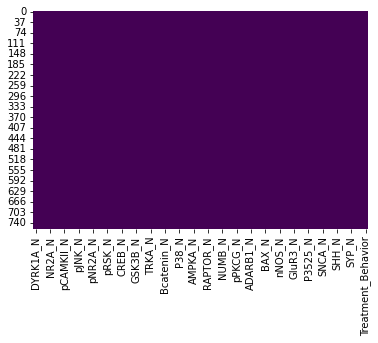

In [95]:
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = IterativeImputer(max_iter=10, random_state=0)
datai0 = []
datai1 = []
datai2 = []
datai3 = []
data1 = []
data2 = []
data3 = []
data4 = []

#creating vectors or list from pandas dataframe
for row in data.pPKCAB_N:
  datai0.append(row)
for row in data.TRKA_N:
  datai1.append(row)
for row in data.APP_N:
  datai2.append(row)
for row in data.GFAP_N:
  datai3.append(row)

for row in data.ELK_N:
  data1.append(row)
for row in data.MEK_N:
  data2.append(row)
for row in data.Bcatenin_N:
  data3.append(row)
for row in data.pCFOS_N:
  data4.append(row)


#joiing x and y parts of linear regressor training for imputing purpose of a multivariate function
data_tr1=np.vstack((datai0[59:91],data1[59:91]))
data_tr2=np.vstack((datai0[59:91],data2[59:91]))
data_tr3=np.vstack((datai0[59:91],data3[59:91]))
data_tr4=np.vstack((datai0[59:91],data4[59:91]))

#training for imputing missing values
imp.fit(np.transpose(data_tr1))
imp.fit(np.transpose(data_tr2))
imp.fit(np.transpose(data_tr3))
imp.fit(np.transpose(data_tr4))

#joiing x and y parts of linear regressor testing for imputing purpose of a multivariate function
data_te1=np.vstack((datai0,data1))
data_te2=np.vstack((datai0,data2))
data_te3=np.vstack((datai0,data3))
data_te4=np.vstack((datai0,data4))

#imputing all missing values in dataframe using x value which has highest correlation wrt y
data_te1 = imp.transform(np.transpose(data_te1))
data_te2 = imp.transform(np.transpose(data_te2))
data_te3 = imp.transform(np.transpose(data_te3))
data_te4 = imp.transform(np.transpose(data_te4))

#splitting array into two arrays x and y
arr_te1 = np.split(data_te1,2,axis=1)
arr_te2 = np.split(data_te2,2,axis=1)
arr_te3 = np.split(data_te3,2,axis=1)
arr_te4 = np.split(data_te4,2,axis=1)

#updating pandas dataframe
for row in range(len(data.ELK_N)):
  data.loc[row, ['ELK_N']] = arr_te1[1][row]
for row in range(len(data.MEK_N)):
  data.loc[row, ['MEK_N']] = arr_te2[1][row]
for row in range(len(data.Bcatenin_N)):
  data.loc[row, ['Bcatenin_N']] = arr_te3[1][row]
for row in range(len(data.pCFOS_N)):
  data.loc[row, ['pCFOS_N']] = arr_te4[1][row]


#final checking using heatmap
print(data.isnull().sum())
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

By the end of this all the missing values are dealt with, now we proceed with building model.

In [96]:
data.head()

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.306382,...,0.108234,1.044979,0.831557,0.188852,0.106305,0.108336,0.427099,1.675652,Control,Memantine_C/S
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.299051,...,0.109749,1.009883,0.849270,0.200404,0.106592,0.104315,0.441581,1.743610,Control,Memantine_C/S
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.291276,...,0.108196,0.996848,0.846709,0.193685,0.108303,0.106219,0.435777,1.926427,Control,Memantine_C/S
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.296729,...,0.119883,0.990225,0.833277,0.192112,0.103184,0.111262,0.391691,1.700563,Control,Memantine_C/S
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.286961,...,0.119524,0.997775,0.878668,0.205604,0.104784,0.110694,0.434154,1.839730,Control,Memantine_C/S


**Question 4 - metrics to be used for evaluation.**


for multiclass classification i chose F1 score,precision,recall, Average Accuracy as metrics. \\
for binary classification i chose F1 score,precision,recall, Average Accuracy as metrics. 

**Question 5 - five fold cross validation.**

Training and validation datasets preparation



In [100]:
df_feat = data.iloc[:,0:68] #getting features from training dataset
df_target_genotype = pd.DataFrame(data['Genotype']) #getting target from training dataset
df_target_behave = pd.DataFrame(data['Treatment_Behavior']) #getting target from training dataset

X_train_geno, X_test_geno, y_train_geno, y_test_geno = train_test_split(df_feat, np.ravel(df_target_genotype),test_size = 0.30, random_state = 101) #splitting training dataset into x and y values both training and validation
X_train_behave, X_test_behave, y_train_behave, y_test_behave = train_test_split(df_feat, np.ravel(df_target_behave),test_size = 0.30, random_state = 101)

Useful only for balancing dataset but without balancing too it gives good scores, so we don't use this

In [ ]:
'''df_target_behave = LabelEncoder().fit_transform(df_target_behave)
df_target_genotype = LabelEncoder().fit_transform(df_target_genotype)
# transform the dataset
oversample = SMOTE()
df_feature ,df_target_behave = oversample.fit_resample(df_feat, df_target_behave)
df_feature_g ,df_target_genotype = oversample.fit_resample(df_feat, df_target_genotype)
# summarize distribution
counter_behave = Counter(df_target_behave)
for k,v in counter_behave.items():
 per = v / len(df_target_behave) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter_behave.keys(), counter_behave.values())
pyplot.show()

counter_genotype = Counter(df_target_genotype)
for k,v in counter_genotype.items():
 per = v / len(df_target_genotype) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter_genotype.keys(), counter_genotype.values())
pyplot.show()'''

In [101]:
print('memantine c/s count:',np.count_nonzero(y_train_behave == 'Memantine_C/S'))
print('memantine s/c count:',np.count_nonzero(y_train_behave == 'Memantine_S/C'))
print('saline c/s count:',np.count_nonzero(y_train_behave == 'Saline_C/S'))
print('saline s/c count:',np.count_nonzero(y_train_behave == 'Saline_S/C'))


memantine c/s count: 154
memantine s/c count: 158
saline c/s count: 128
saline s/c count: 93


Part a - Linear SVM with regularization as hyperparameter

In [102]:
param_grid_linear_geno = {'C': [0.01, 0.1, 0.4, 0.5],
              'kernel': ['linear']} 
param_grid_linear_behave = {'C': [0.01, 0.1, 0.4, 0.5],
              'kernel': ['linear']}   

#iterating over different parameters and finding best among them
svm_linear_geno = GridSearchCV(SVC(), param_grid_linear_geno, verbose = 3, cv= 5)
# fitting x and y values for training the model
svm_linear_geno.fit(X_train_geno, y_train_geno)
# print best parameter after tuning
print(svm_linear_geno.best_params_)
# print how our model looks after hyper-parameter tuning
print(svm_linear_geno.best_estimator_)
grid_predictions_linear_geno = svm_linear_geno.predict(X_test_geno)
# print classification report
print(classification_report(y_test_geno, grid_predictions_linear_geno)) 

#iterating over different parameters and finding best among them
svm_linear_behave = GridSearchCV(SVC(), param_grid_linear_behave, verbose = 3, cv= 5)
svm_linear_behave.fit(X_train_behave, y_train_behave)
# print best parameter after tuning
print(svm_linear_behave.best_params_)
# print how our model looks after hyper-parameter tuning
print(svm_linear_behave.best_estimator_)
grid_predictions_linear_behave = svm_linear_behave.predict(X_test_behave)
# print classification report
print(classification_report(y_test_behave, grid_predictions_linear_behave))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.542 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.561 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.561 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.566 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.566 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.729 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.654 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.710 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.745 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.708 total time=   0.0s
[CV 1/5] END ..............C=0.4, kernel=linear;, score=0.822 total time=   0.0s
[CV 2/5] END ..............C=0.4, kernel=linear;,

Part b - RBF Kernel SVM with kernel width and regularization as hyperparameters

In [103]:
param_grid_rbf_geno = {'C': [0.01, 0.1, 0.4, 0.5],
                          'gamma': [0.1, 0.01],
                          'kernel': ['rbf']} 
param_grid_rbf_behave = {'C': [0.01, 0.1, 0.4, 0.5],
                            'gamma': [0.1, 0.01],
                            'kernel': ['rbf']}   

svm_rbf_geno = GridSearchCV(SVC(), param_grid_rbf_geno, verbose = 3, cv= 5)
svm_rbf_geno.fit(X_train_geno, y_train_geno)
# print best parameter after tuning
print(svm_rbf_geno.best_params_)
# print how our model looks after hyper-parameter tuning
print(svm_rbf_geno.best_estimator_)
grid_predictions_rbf_geno = svm_rbf_geno.predict(X_test_geno)
# print classification report
print(classification_report(y_test_geno, grid_predictions_rbf_geno)) 


svm_rbf_behave = GridSearchCV(SVC(), param_grid_rbf_behave, verbose = 3, cv= 5)
svm_rbf_behave.fit(X_train_behave, y_train_behave)
# print best parameter after tuning
print(svm_rbf_behave.best_params_)
# print how our model looks after hyper-parameter tuning
print(svm_rbf_behave.best_estimator_)
grid_predictions_rbf_behave = svm_rbf_behave.predict(X_test_behave)
# print classification report
print(classification_report(y_test_behave, grid_predictions_rbf_behave))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.561 total time=   0.0s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.561 total time=   0.0s
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.561 total time=   0.0s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.566 total time=   0.0s
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.566 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.561 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.561 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.561 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.566 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.566 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.570 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;,

Part - c - Neural network model with Relu and softmax as activation functions.

In [104]:
# import the libraries 
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Model, Input
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

#def single_NN(unit):
  #input_layer = Input(shape=(68,), name='input') # 76 dimensional input
  #hidden_layer1 = Dense(units=unit, activation="relu", name="hidden_layer1")(input_layer)
  #output_layer = Dense(units=4, activation="softmax", name="output_layer")(hidden_layer1)
  # Create the model
  #model = Model(input_layer, output_layer)
  #model = keras.Sequential([
    #keras.layers.Dense(unit, activation='relu', input_shape=(68,)),
   # keras.layers.Dense(4, activation='softmax')])
  #model.compile(loss='categorical_crossentropy', optimizer = 'SGD', metrics=['accuracy'])
  #return model
#model_behave = KerasClassifier(build_fn= single_NN)


mlp_clf = MLPClassifier(hidden_layer_sizes=64,max_iter = 300,activation = 'relu',solver = 'sgd')
params={'batch_size':[16,32,64], 
        'max_iter':[10,100,1000],
        'hidden_layer_sizes':[32,64],   
        }
NN_behave = GridSearchCV(estimator=mlp_clf, param_grid=params,verbose = 3, cv=5)
NN_behave.fit(X_train_behave, y_train_behave)
# print best parameter after tuning
print(NN_behave.best_params_)
# print how our model looks after hyper-parameter tuning
print(NN_behave.best_estimator_)
grid_predictions_NN_behave = NN_behave.predict(X_test_behave)
# print classification report
print(classification_report(y_test_behave, grid_predictions_NN_behave, zero_division=0))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END batch_size=16, hidden_layer_sizes=32, max_iter=10;, score=0.617 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=16, hidden_layer_sizes=32, max_iter=10;, score=0.551 total time=   0.2s
[CV 3/5] END batch_size=16, hidden_layer_sizes=32, max_iter=10;, score=0.542 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=16, hidden_layer_sizes=32, max_iter=10;, score=0.575 total time=   0.1s
[CV 5/5] END batch_size=16, hidden_layer_sizes=32, max_iter=10;, score=0.632 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=16, hidden_layer_sizes=32, max_iter=100;, score=0.907 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=16, hidden_layer_sizes=32, max_iter=100;, score=0.822 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=16, hidden_layer_sizes=32, max_iter=100;, score=0.879 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=16, hidden_layer_sizes=32, max_iter=100;, score=0.896 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=16, hidden_layer_sizes=32, max_iter=100;, score=0.811 total time=   0.8s
[CV 1/5] END batch_size=16, hidden_layer_sizes=32, max_iter=1000;, score=0.991 total time=   4.5s
[CV 2/5] END batch_size=16, hidden_layer_sizes=32, max_iter=1000;, score=0.935 total time=   3.0s
[CV 3/5] END batch_size=16, hidden_layer_sizes=32, max_iter=1000;, score=1.000 total time=   8.6s
[CV 4/5] END batch_size=16, hidden_layer_sizes=32, max_iter=1000;, score=0.934 total time=   3.0s
[CV 5/5] END batch_size=16, hidden_layer_sizes=32, max_iter=1000;, score=0.887 total time=   2.5s
[CV 1/5] END batch_size=16, hidden_layer_sizes=64, max_iter=10;, score=0.626 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=16, hidden_layer_sizes=64, max_iter=10;, score=0.598 total time=   0.2s
[CV 3/5] END batch_size=16, hidden_layer_sizes=64, max_iter=10;, score=0.598 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=16, hidden_layer_sizes=64, max_iter=10;, score=0.623 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=16, hidden_layer_sizes=64, max_iter=10;, score=0.604 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=16, hidden_layer_sizes=64, max_iter=100;, score=0.916 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=16, hidden_layer_sizes=64, max_iter=100;, score=0.869 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=16, hidden_layer_sizes=64, max_iter=100;, score=0.879 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=16, hidden_layer_sizes=64, max_iter=100;, score=0.896 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=16, hidden_layer_sizes=64, max_iter=100;, score=0.868 total time=   0.9s
[CV 1/5] END batch_size=16, hidden_layer_sizes=64, max_iter=1000;, score=0.981 total time=   4.6s
[CV 2/5] END batch_size=16, hidden_layer_sizes=64, max_iter=1000;, score=0.953 total time=   4.8s
[CV 3/5] END batch_size=16, hidden_layer_sizes=64, max_iter=1000;, score=0.953 total time=   5.4s
[CV 4/5] END batch_size=16, hidden_layer_sizes=64, max_iter=1000;, score=1.000 total time=   8.7s
[CV 5/5] END batch_size=16, hidden_layer_sizes=64, max_iter=1000;, score=0.972 total time=   5.8s
[CV 1/5] END batch_size=32, hidden_layer_sizes=32, max_iter=10;, score=0.570 total time=   0.1s
[CV 2/5] END batch_size=32, hidden_layer_sizes=32, max_iter=10;, score=0.617 total time=   0.1s
[CV 3/5] END batch_size=32, hidden_layer_sizes=32, max_iter=10;, score=0.467 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=32, hidden_layer_sizes=32, max_iter=10;, score=0.547 total time=   0.1s
[CV 5/5] END batch_size=32, hidden_layer_sizes=32, max_iter=10;, score=0.547 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=32, hidden_layer_sizes=32, max_iter=100;, score=0.794 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=32, hidden_layer_sizes=32, max_iter=100;, score=0.748 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=32, hidden_layer_sizes=32, max_iter=100;, score=0.804 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=32, hidden_layer_sizes=32, max_iter=100;, score=0.811 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=32, hidden_layer_sizes=32, max_iter=100;, score=0.811 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=32, hidden_layer_sizes=32, max_iter=1000;, score=0.991 total time=   4.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=32, hidden_layer_sizes=32, max_iter=1000;, score=0.981 total time=   6.3s
[CV 3/5] END batch_size=32, hidden_layer_sizes=32, max_iter=1000;, score=0.972 total time=   4.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=32, hidden_layer_sizes=32, max_iter=1000;, score=0.981 total time=   4.5s
[CV 5/5] END batch_size=32, hidden_layer_sizes=32, max_iter=1000;, score=0.934 total time=   5.9s
[CV 1/5] END batch_size=32, hidden_layer_sizes=64, max_iter=10;, score=0.533 total time=   0.1s
[CV 2/5] END batch_size=32, hidden_layer_sizes=64, max_iter=10;, score=0.598 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=32, hidden_layer_sizes=64, max_iter=10;, score=0.533 total time=   0.1s
[CV 4/5] END batch_size=32, hidden_layer_sizes=64, max_iter=10;, score=0.632 total time=   0.1s
[CV 5/5] END batch_size=32, hidden_layer_sizes=64, max_iter=10;, score=0.594 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=32, hidden_layer_sizes=64, max_iter=100;, score=0.925 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=32, hidden_layer_sizes=64, max_iter=100;, score=0.757 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=32, hidden_layer_sizes=64, max_iter=100;, score=0.785 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=32, hidden_layer_sizes=64, max_iter=100;, score=0.849 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=32, hidden_layer_sizes=64, max_iter=100;, score=0.764 total time=   0.6s
[CV 1/5] END batch_size=32, hidden_layer_sizes=64, max_iter=1000;, score=0.953 total time=   2.8s
[CV 2/5] END batch_size=32, hidden_layer_sizes=64, max_iter=1000;, score=0.963 total time=   6.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=32, hidden_layer_sizes=64, max_iter=1000;, score=0.991 total time=   5.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=32, hidden_layer_sizes=64, max_iter=1000;, score=0.991 total time=   5.3s
[CV 5/5] END batch_size=32, hidden_layer_sizes=64, max_iter=1000;, score=0.943 total time=   6.1s
[CV 1/5] END batch_size=64, hidden_layer_sizes=32, max_iter=10;, score=0.561 total time=   0.1s
[CV 2/5] END batch_size=64, hidden_layer_sizes=32, max_iter=10;, score=0.505 total time=   0.1s
[CV 3/5] END batch_size=64, hidden_layer_sizes=32, max_iter=10;, score=0.477 total time=   0.0s
[CV 4/5] END batch_size=64, hidden_layer_sizes=32, max_iter=10;, score=0.472 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686:

[CV 5/5] END batch_size=64, hidden_layer_sizes=32, max_iter=10;, score=0.481 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=64, hidden_layer_sizes=32, max_iter=100;, score=0.710 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=64, hidden_layer_sizes=32, max_iter=100;, score=0.748 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=64, hidden_layer_sizes=32, max_iter=100;, score=0.673 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=64, hidden_layer_sizes=32, max_iter=100;, score=0.708 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=64, hidden_layer_sizes=32, max_iter=100;, score=0.745 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=64, hidden_layer_sizes=32, max_iter=1000;, score=0.953 total time=   2.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=64, hidden_layer_sizes=32, max_iter=1000;, score=0.916 total time=   2.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=64, hidden_layer_sizes=32, max_iter=1000;, score=0.944 total time=   3.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=64, hidden_layer_sizes=32, max_iter=1000;, score=0.962 total time=   3.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=64, hidden_layer_sizes=32, max_iter=1000;, score=0.877 total time=   2.7s
[CV 1/5] END batch_size=64, hidden_layer_sizes=64, max_iter=10;, score=0.561 total time=   0.1s
[CV 2/5] END batch_size=64, hidden_layer_sizes=64, max_iter=10;, score=0.533 total time=   0.1s
[CV 3/5] END batch_size=64, hidden_layer_sizes=64, max_iter=10;, score=0.505 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=64, hidden_layer_sizes=64, max_iter=10;, score=0.481 total time=   0.1s
[CV 5/5] END batch_size=64, hidden_layer_sizes=64, max_iter=10;, score=0.528 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=64, hidden_layer_sizes=64, max_iter=100;, score=0.785 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=64, hidden_layer_sizes=64, max_iter=100;, score=0.757 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=64, hidden_layer_sizes=64, max_iter=100;, score=0.645 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=64, hidden_layer_sizes=64, max_iter=100;, score=0.755 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=64, hidden_layer_sizes=64, max_iter=100;, score=0.717 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=64, hidden_layer_sizes=64, max_iter=1000;, score=0.972 total time=   6.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=64, hidden_layer_sizes=64, max_iter=1000;, score=0.935 total time=   6.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=64, hidden_layer_sizes=64, max_iter=1000;, score=0.935 total time=   4.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=64, hidden_layer_sizes=64, max_iter=1000;, score=0.972 total time=   7.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=64, hidden_layer_sizes=64, max_iter=1000;, score=0.887 total time=   4.8s
{'batch_size': 16, 'hidden_layer_sizes': 64, 'max_iter': 1000}
MLPClassifier(batch_size=16, hidden_layer_sizes=64, max_iter=1000, solver='sgd')
               precision    recall  f1-score   support

Memantine_C/S       1.00      1.00      1.00        71
Memantine_S/C       1.00      1.00      1.00        67
   Saline_C/S       1.00      1.00      1.00        52
   Saline_S/C       1.00      1.00      1.00        39

     accuracy                           1.00       229
    macro avg       1.00      1.00      1.00       229
 weighted avg       1.00      1.00      1.00       229



In [105]:
mlp_clf_g = MLPClassifier(hidden_layer_sizes=64,max_iter = 300,activation = 'relu',solver = 'sgd')
params={'batch_size':[16,32,64], 
        'max_iter':[10,100,1000],
        'hidden_layer_sizes':[32,64],   
        }

NN_geno = GridSearchCV(estimator=mlp_clf_g, param_grid=params,verbose = 3, cv=5)
NN_geno.fit(X_train_geno, y_train_geno)
# print best parameter after tuning
print(NN_geno.best_params_)
# print how our model looks after hyper-parameter tuning
print(NN_geno.best_estimator_)
grid_predictions_NN_geno = NN_geno.predict(X_test_geno)
# print classification report
print(classification_report(y_test_geno, grid_predictions_NN_geno, zero_division=0))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END batch_size=16, hidden_layer_sizes=32, max_iter=10;, score=0.636 total time=   0.1s
[CV 2/5] END batch_size=16, hidden_layer_sizes=32, max_iter=10;, score=0.598 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=16, hidden_layer_sizes=32, max_iter=10;, score=0.551 total time=   0.1s
[CV 4/5] END batch_size=16, hidden_layer_sizes=32, max_iter=10;, score=0.575 total time=   0.1s
[CV 5/5] END batch_size=16, hidden_layer_sizes=32, max_iter=10;, score=0.585 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=16, hidden_layer_sizes=32, max_iter=100;, score=0.626 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=16, hidden_layer_sizes=32, max_iter=100;, score=0.682 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=16, hidden_layer_sizes=32, max_iter=100;, score=0.692 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=16, hidden_layer_sizes=32, max_iter=100;, score=0.651 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=16, hidden_layer_sizes=32, max_iter=100;, score=0.764 total time=   0.8s
[CV 1/5] END batch_size=16, hidden_layer_sizes=32, max_iter=1000;, score=0.981 total time=   5.3s
[CV 2/5] END batch_size=16, hidden_layer_sizes=32, max_iter=1000;, score=0.916 total time=   6.1s
[CV 3/5] END batch_size=16, hidden_layer_sizes=32, max_iter=1000;, score=0.953 total time=   4.2s
[CV 4/5] END batch_size=16, hidden_layer_sizes=32, max_iter=1000;, score=0.915 total time=   3.8s
[CV 5/5] END batch_size=16, hidden_layer_sizes=32, max_iter=1000;, score=0.915 total time=   5.8s
[CV 1/5] END batch_size=16, hidden_layer_sizes=64, max_iter=10;, score=0.598 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=16, hidden_layer_sizes=64, max_iter=10;, score=0.579 total time=   0.1s
[CV 3/5] END batch_size=16, hidden_layer_sizes=64, max_iter=10;, score=0.579 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=16, hidden_layer_sizes=64, max_iter=10;, score=0.613 total time=   0.2s
[CV 5/5] END batch_size=16, hidden_layer_sizes=64, max_iter=10;, score=0.642 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=16, hidden_layer_sizes=64, max_iter=100;, score=0.617 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=16, hidden_layer_sizes=64, max_iter=100;, score=0.692 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=16, hidden_layer_sizes=64, max_iter=100;, score=0.636 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=16, hidden_layer_sizes=64, max_iter=100;, score=0.736 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=16, hidden_layer_sizes=64, max_iter=100;, score=0.783 total time=   0.9s
[CV 1/5] END batch_size=16, hidden_layer_sizes=64, max_iter=1000;, score=0.944 total time=   4.3s
[CV 2/5] END batch_size=16, hidden_layer_sizes=64, max_iter=1000;, score=0.972 total time=   6.7s
[CV 3/5] END batch_size=16, hidden_layer_sizes=64, max_iter=1000;, score=0.944 total time=   3.3s
[CV 4/5] END batch_size=16, hidden_layer_sizes=64, max_iter=1000;, score=0.953 total time=   5.0s
[CV 5/5] END batch_size=16, hidden_layer_sizes=64, max_iter=1000;, score=0.925 total time=   5.4s
[CV 1/5] END batch_size=32, hidden_layer_sizes=32, max_iter=10;, score=0.523 total time=   0.1s
[CV 2/5] END batch_size=32, hidden_layer_sizes=32, max_iter=10;, score=0.636 total time=   0.1s
[CV 3/5] END batch_size=32, hidden_layer_sizes=32, max_iter=10;, score=0.570 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=32, hidden_layer_sizes=32, max_iter=10;, score=0.613 total time=   0.1s
[CV 5/5] END batch_size=32, hidden_layer_sizes=32, max_iter=10;, score=0.566 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=32, hidden_layer_sizes=32, max_iter=100;, score=0.514 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=32, hidden_layer_sizes=32, max_iter=100;, score=0.626 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=32, hidden_layer_sizes=32, max_iter=100;, score=0.654 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=32, hidden_layer_sizes=32, max_iter=100;, score=0.604 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=32, hidden_layer_sizes=32, max_iter=100;, score=0.726 total time=   0.5s
[CV 1/5] END batch_size=32, hidden_layer_sizes=32, max_iter=1000;, score=0.916 total time=   2.8s
[CV 2/5] END batch_size=32, hidden_layer_sizes=32, max_iter=1000;, score=0.907 total time=   2.3s
[CV 3/5] END batch_size=32, hidden_layer_sizes=32, max_iter=1000;, score=0.897 total time=   4.7s
[CV 4/5] END batch_size=32, hidden_layer_sizes=32, max_iter=1000;, score=0.877 total time=   2.8s
[CV 5/5] END batch_size=32, hidden_layer_sizes=32, max_iter=1000;, score=0.915 total time=   3.9s
[CV 1/5] END batch_size=32, hidden_layer_sizes=64, max_iter=10;, score=0.579 total time=   0.1s
[CV 2/5] END batch_size=32, hidden_layer_sizes=64, max_iter=10;, score=0.533 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=32, hidden_layer_sizes=64, max_iter=10;, score=0.617 total time=   0.1s
[CV 4/5] END batch_size=32, hidden_layer_sizes=64, max_iter=10;, score=0.604 total time=   0.1s
[CV 5/5] END batch_size=32, hidden_layer_sizes=64, max_iter=10;, score=0.613 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=32, hidden_layer_sizes=64, max_iter=100;, score=0.607 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=32, hidden_layer_sizes=64, max_iter=100;, score=0.607 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=32, hidden_layer_sizes=64, max_iter=100;, score=0.598 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=32, hidden_layer_sizes=64, max_iter=100;, score=0.604 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=32, hidden_layer_sizes=64, max_iter=100;, score=0.708 total time=   0.7s
[CV 1/5] END batch_size=32, hidden_layer_sizes=64, max_iter=1000;, score=0.972 total time=   6.0s
[CV 2/5] END batch_size=32, hidden_layer_sizes=64, max_iter=1000;, score=0.907 total time=   3.5s
[CV 3/5] END batch_size=32, hidden_layer_sizes=64, max_iter=1000;, score=0.972 total time=   4.4s
[CV 4/5] END batch_size=32, hidden_layer_sizes=64, max_iter=1000;, score=0.981 total time=   6.6s
[CV 5/5] END batch_size=32, hidden_layer_sizes=64, max_iter=1000;, score=0.887 total time=   2.5s
[CV 1/5] END batch_size=64, hidden_layer_sizes=32, max_iter=10;, score=0.579 total time=   0.0s
[CV 2/5] END batch_size=64, hidden_layer_sizes=32, max_iter=10;, score=0.673 total time=   0.0s
[CV 3/5] END batch_size=64, hidden_layer_sizes=32, max_iter=10;, score=0.561 total time=   0.0s
[CV 4/5] END batch_size=64, hidden_layer_sizes=32, max_iter=10;, score=0.519 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686:

[CV 5/5] END batch_size=64, hidden_layer_sizes=32, max_iter=10;, score=0.623 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=64, hidden_layer_sizes=32, max_iter=100;, score=0.598 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=64, hidden_layer_sizes=32, max_iter=100;, score=0.617 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=64, hidden_layer_sizes=32, max_iter=100;, score=0.570 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=64, hidden_layer_sizes=32, max_iter=100;, score=0.623 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=64, hidden_layer_sizes=32, max_iter=100;, score=0.698 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=64, hidden_layer_sizes=32, max_iter=1000;, score=0.832 total time=   2.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=64, hidden_layer_sizes=32, max_iter=1000;, score=0.907 total time=   2.7s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=64, hidden_layer_sizes=32, max_iter=1000;, score=0.897 total time=   4.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=64, hidden_layer_sizes=32, max_iter=1000;, score=0.934 total time=   2.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=64, hidden_layer_sizes=32, max_iter=1000;, score=0.943 total time=   2.5s
[CV 1/5] END batch_size=64, hidden_layer_sizes=64, max_iter=10;, score=0.617 total time=   0.1s
[CV 2/5] END batch_size=64, hidden_layer_sizes=64, max_iter=10;, score=0.505 total time=   0.1s
[CV 3/5] END batch_size=64, hidden_layer_sizes=64, max_iter=10;, score=0.505 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=64, hidden_layer_sizes=64, max_iter=10;, score=0.585 total time=   0.1s
[CV 5/5] END batch_size=64, hidden_layer_sizes=64, max_iter=10;, score=0.585 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=64, hidden_layer_sizes=64, max_iter=100;, score=0.645 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=64, hidden_layer_sizes=64, max_iter=100;, score=0.617 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=64, hidden_layer_sizes=64, max_iter=100;, score=0.570 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=64, hidden_layer_sizes=64, max_iter=100;, score=0.623 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=64, hidden_layer_sizes=64, max_iter=100;, score=0.632 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=64, hidden_layer_sizes=64, max_iter=1000;, score=0.860 total time=   7.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=64, hidden_layer_sizes=64, max_iter=1000;, score=0.897 total time=   4.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=64, hidden_layer_sizes=64, max_iter=1000;, score=0.850 total time=   4.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=64, hidden_layer_sizes=64, max_iter=1000;, score=0.887 total time=   7.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=64, hidden_layer_sizes=64, max_iter=1000;, score=0.915 total time=   4.8s
{'batch_size': 16, 'hidden_layer_sizes': 64, 'max_iter': 1000}
MLPClassifier(batch_size=16, hidden_layer_sizes=64, max_iter=1000, solver='sgd')
              precision    recall  f1-score   support

     Control       0.93      0.99      0.96       135
      Ts65Dn       0.99      0.89      0.94        94

    accuracy                           0.95       229
   macro avg       0.96      0.94      0.95       229
weighted avg       0.95      0.95      0.95       229



part d - Random forest with max tree depth and max variables per node as hyperparameters

In [106]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
rnf_behave = GridSearchCV(RandomForestClassifier(),param_grid=param_grid, verbose=3, cv=5)
rnf_behave.fit(X_train_behave, y_train_behave)
y_pred  = rnf_behave.predict(X_test_behave)
print(rnf_behave.best_estimator_)
print(classification_report(y_pred, y_test_behave))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.645 total time=   0.4s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.654 total time=   0.4s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.682 total time=   0.4s
[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.651 total time=   0.5s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.670 total time=   0.4s
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.832 total time=   0.5s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.850 total time=   1.8s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.822 total time=   0.4s
[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.849 total time=   0.4s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.802 total t

In [107]:
param_grid_geno = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 5, 7],
    'max_leaf_nodes': [3, 5, 7],
}
rnf_geno = GridSearchCV(RandomForestClassifier(),param_grid=param_grid_geno, verbose=3, cv=5)
rnf_geno.fit(X_train_geno, y_train_geno)
y_pred_geno  = rnf_geno.predict(X_test_geno)
print(rnf_geno.best_estimator_)
print(classification_report(y_test_geno,y_pred_geno, zero_division=0))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.804 total time=   0.4s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.766 total time=   0.4s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.813 total time=   0.4s
[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.840 total time=   0.6s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.830 total time=   0.4s
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=5;, score=0.850 total time=   0.3s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=5;, score=0.897 total time=   0.3s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=5;, score=0.879 total time=   0.3s
[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=5;, score=0.915 total time=   0.3s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=5;, score=0.868 total t

**Question 6 - checking feature importance for each model**

Part 1 - Univariate selection

In [109]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#apply SelectKBest class to extract top 10 best features
bestfeatures_geno = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures_geno.fit(X_train_geno,y_train_geno)
dfscores_geno = pd.DataFrame(fit.scores_)
dfcolumns_geno = pd.DataFrame(X_train_geno.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns_geno,dfscores_geno],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print('Top 10 fetures for genotype target:')
print(featureScores.nlargest(10,'Score'))  #print 10 best features

#apply SelectKBest class to extract top 10 best features
bestfeatures_behave = SelectKBest(score_func=chi2, k=10)
fit_behave = bestfeatures_behave.fit(X_train_behave,y_train_behave)
dfscores_behave = pd.DataFrame(fit_behave.scores_)
dfcolumns_behave = pd.DataFrame(X_train_behave.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns_behave,dfscores_behave],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print('Top 10 fetures for Treatment behaviour target:')
print(featureScores.nlargest(10,'Score'))  #print 10 best features


Top 10 fetures for genotype target:
           Specs     Score
42       pPKCG_N  7.225360
46  AcetylH3K9_N  4.243300
44          S6_N  1.974918
26         APP_N  1.279151
3         NR2A_N  1.254637
14      pPKCAB_N  1.028177
0       DYRK1A_N  0.684451
52         Tau_N  0.630941
38      pP70S6_N  0.578531
20         ERK_N  0.447800
Top 10 fetures for Treatment behaviour target:
          Specs      Score
6     pCAMKII_N  84.849173
28       SOD1_N  44.996942
14     pPKCAB_N  35.258529
67       CaNA_N  29.226019
0      DYRK1A_N  18.699401
20        ERK_N  12.137936
8        pELK_N   7.625332
21      GSK3B_N   6.843528
12      pNR2A_N   6.622773
61  Ubiquitin_N   6.158312


Part 2 - Feature importance

Top 10 fetures for Treatment behaviour target:
          Specs     Score
28       SOD1_N  0.072713
67       CaNA_N  0.052812
6     pCAMKII_N  0.049620
14     pPKCAB_N  0.035613
42      pPKCG_N  0.029276
61  Ubiquitin_N  0.028707
49        ARC_N  0.026037
38     pP70S6_N  0.025655
35      pNUMB_N  0.024273
60       SNCA_N  0.022720


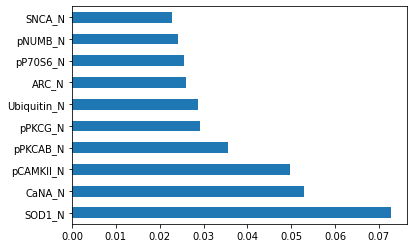

Top 10 fetures for genotype target:
           Specs     Score
26         APP_N  0.083460
46  AcetylH3K9_N  0.034645
52         Tau_N  0.032937
54       GluR3_N  0.031563
44          S6_N  0.025058
30         P38_N  0.024010
42       pPKCG_N  0.022720
29        MTOR_N  0.020028
31       pMTOR_N  0.019992
0       DYRK1A_N  0.019718


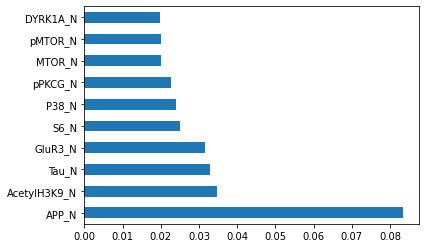

In [114]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model_behave = ExtraTreesClassifier()
model_behave.fit(X_train_behave,y_train_behave)
dfscores_behave = pd.DataFrame(model_behave.feature_importances_)
dfcolumns_behave = pd.DataFrame(X_train_behave.columns)
featureScores = pd.concat([dfcolumns_behave,dfscores_behave],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print('Top 10 fetures for Treatment behaviour target:')
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_behave.feature_importances_, index=X_train_behave.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

model_geno = ExtraTreesClassifier()
model_geno.fit(X_train_geno,y_train_geno)
dfscores_geno = pd.DataFrame(model_geno.feature_importances_)
dfcolumns_geno = pd.DataFrame(X_train_geno.columns)
featureScores = pd.concat([dfcolumns_geno,dfscores_geno],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print('Top 10 fetures for genotype target:')
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_geno.feature_importances_, index=X_train_geno.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Question 7 - feature removing using recursive feature elimination.**

In [115]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

min_features_to_select = 5  # Minimum number of features to consider
clf_geno = RandomForestClassifier(max_depth=5, max_leaf_nodes=7)
clf_behave = RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=150)
cv = StratifiedKFold(5)

rfecv_geno = RFECV(
    estimator=clf_geno,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

rfecv_behave = RFECV(
    estimator=clf_behave,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv_geno.fit(X_train_geno, y_train_geno)
rfecv_behave.fit(X_train_behave, y_train_behave)

print(f"Optimal number of features for genotype classification: {rfecv_geno.n_features_}")
print(f"Optimal number of features for treatment behaviour classification: {rfecv_behave.n_features_}")

Optimal number of features for genotype classification: 64
Optimal number of features for treatment behaviour classification: 30


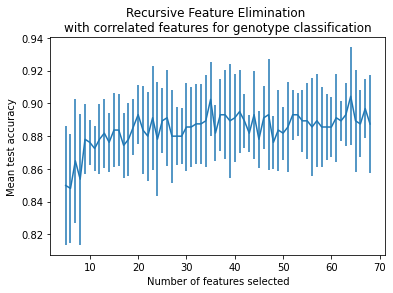

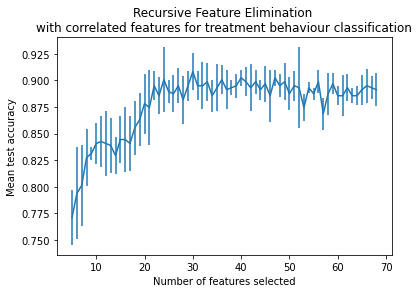

In [116]:
import matplotlib.pyplot as plt

n_scores = len(rfecv_geno.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv_geno.cv_results_["mean_test_score"],
    yerr=rfecv_geno.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features for genotype classification")
plt.show()

n_scores = len(rfecv_behave.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv_behave.cv_results_["mean_test_score"],
    yerr=rfecv_behave.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features for treatment behaviour classification")
plt.show()

**Question 8 - testing of all the models**

preparing test dataset

Null values in DYRK1A_N : 0
Null values in ITSN1_N : 0
Null values in BDNF_N : 0
Null values in NR1_N : 0
Null values in NR2A_N : 0
Null values in pAKT_N : 0
Null values in pBRAF_N : 0
Null values in pCAMKII_N : 0
Null values in pCREB_N : 0
Null values in pELK_N : 0
Null values in pERK_N : 0
Null values in pJNK_N : 0
Null values in PKCA_N : 0
Null values in pMEK_N : 0
Null values in pNR1_N : 0
Null values in pNR2A_N : 0
Null values in pNR2B_N : 0
Null values in pPKCAB_N : 0
Null values in pRSK_N : 0
Null values in AKT_N : 0
Null values in BRAF_N : 0
Null values in CAMKII_N : 0
Null values in CREB_N : 0
Null values in ELK_N : 0
Null values in ERK_N : 0
Null values in GSK3B_N : 0
Null values in JNK_N : 0
Null values in MEK_N : 0
Null values in TRKA_N : 0
Null values in RSK_N : 0
Null values in APP_N : 0
Null values in Bcatenin_N : 0
Null values in SOD1_N : 0
Null values in MTOR_N : 0
Null values in P38_N : 0
Null values in pMTOR_N : 0
Null values in DSCR1_N : 0
Null values in AMPKA_N : 0

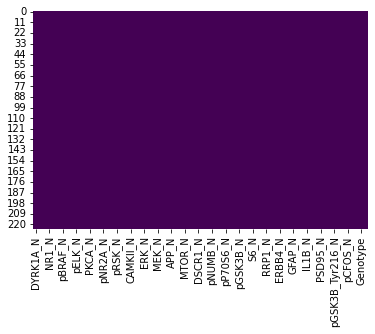

In [117]:
test = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv')
indxt = []
for col in test.columns:
    test[col].replace({'?':np.nan},inplace=True)
sns.heatmap(test.isnull(),cbar=False,cmap='viridis')
for i in range(len(test.isnull().sum())):
  print(f'Null values in {test.columns[i]} :',test.isnull().sum()[i])
  if test.isnull().sum()[i] > 10:
    indxt.append(i)
print(indxt)
test.drop(test.columns[indxt], axis=1,inplace=True)
sns.heatmap(test.isnull(),cbar=False,cmap='viridis')
test.drop(['ITSN1_N','pERK_N','BRAF_N' ,'pNR1_N'], axis=1, inplace=True)
test.info()

linear svm testing:

In [118]:
df_feat = test.iloc[:,0:68]
df_target_genotype = pd.DataFrame(test['Genotype'])
df_target_behave = pd.DataFrame(test['Treatment_Behavior'])

prediction_svm_geno_linear = svm_linear_geno.predict(df_feat)
print(classification_report(df_target_genotype,prediction_svm_geno_linear))

prediction_svm_behave_linear = svm_linear_behave.predict(df_feat)
print(classification_report(df_target_behave,prediction_svm_behave_linear))

              precision    recall  f1-score   support

     Control       0.68      0.81      0.74       135
      Ts65Dn       0.60      0.42      0.50        90

    accuracy                           0.66       225
   macro avg       0.64      0.62      0.62       225
weighted avg       0.65      0.66      0.64       225

               precision    recall  f1-score   support

Memantine_C/S       0.64      0.45      0.53        60
Memantine_S/C       0.76      0.78      0.77        60
   Saline_C/S       0.58      0.75      0.65        60
   Saline_S/C       0.70      0.67      0.68        45

     accuracy                           0.66       225
    macro avg       0.67      0.66      0.66       225
 weighted avg       0.67      0.66      0.66       225



RBF kernel svm testing :

In [119]:
#prediction and comparing predicted value with target
prediction_svm_geno_rbf = svm_rbf_geno.predict(df_feat)
print(classification_report(df_target_genotype,prediction_svm_geno_rbf))

prediction_svm_behave_rbf = svm_rbf_behave.predict(df_feat)
print(classification_report(df_target_behave,prediction_svm_behave_rbf))

              precision    recall  f1-score   support

     Control       0.74      0.77      0.76       135
      Ts65Dn       0.64      0.60      0.62        90

    accuracy                           0.70       225
   macro avg       0.69      0.69      0.69       225
weighted avg       0.70      0.70      0.70       225

               precision    recall  f1-score   support

Memantine_C/S       0.58      0.82      0.68        60
Memantine_S/C       0.74      0.70      0.72        60
   Saline_C/S       0.69      0.40      0.51        60
   Saline_S/C       0.62      0.67      0.65        45

     accuracy                           0.64       225
    macro avg       0.66      0.65      0.64       225
 weighted avg       0.66      0.64      0.64       225



Neural network testing :

In [120]:
prediction_nn_geno = NN_geno.predict(df_feat)
print(classification_report(df_target_genotype,prediction_nn_geno))

prediction_nn_behave = NN_behave.predict(df_feat)
print(classification_report(df_target_behave,prediction_nn_behave))

              precision    recall  f1-score   support

     Control       0.78      0.77      0.77       135
      Ts65Dn       0.66      0.67      0.66        90

    accuracy                           0.73       225
   macro avg       0.72      0.72      0.72       225
weighted avg       0.73      0.73      0.73       225

               precision    recall  f1-score   support

Memantine_C/S       0.55      0.47      0.50        60
Memantine_S/C       0.77      0.85      0.81        60
   Saline_C/S       0.54      0.62      0.57        60
   Saline_S/C       0.77      0.67      0.71        45

     accuracy                           0.65       225
    macro avg       0.66      0.65      0.65       225
 weighted avg       0.65      0.65      0.65       225



Random forest testing:

In [121]:
prediction_rnf_geno = rnf_geno.predict(df_feat)
print(classification_report(df_target_genotype,prediction_rnf_geno))

prediction_rnf_behave = rnf_behave.predict(df_feat)
print(classification_report(df_target_behave,prediction_rnf_behave))

              precision    recall  f1-score   support

     Control       0.74      0.81      0.77       135
      Ts65Dn       0.67      0.58      0.62        90

    accuracy                           0.72       225
   macro avg       0.70      0.69      0.70       225
weighted avg       0.71      0.72      0.71       225

               precision    recall  f1-score   support

Memantine_C/S       0.61      0.80      0.69        60
Memantine_S/C       0.75      0.75      0.75        60
   Saline_C/S       0.71      0.48      0.57        60
   Saline_S/C       0.67      0.67      0.67        45

     accuracy                           0.68       225
    macro avg       0.68      0.67      0.67       225
 weighted avg       0.68      0.68      0.67       225



# **Objective 2:** 

**Question 9 - To use a pre-trained Conv-net as fixed extractor**



In [122]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

Load data

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Mounted at /content/drive


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Visualize a few images

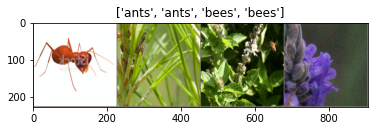

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Training the model

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

Visualizing the model predictions

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

ConvNet as fixed feature extractor

In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Train and evaluate

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5640 Acc: 0.7172
val Loss: 0.3547 Acc: 0.8497

Epoch 1/24
----------
train Loss: 0.5383 Acc: 0.7623
val Loss: 0.2534 Acc: 0.9085

Epoch 2/24
----------
train Loss: 0.5069 Acc: 0.7869
val Loss: 0.2572 Acc: 0.9150

Epoch 3/24
----------
train Loss: 0.4901 Acc: 0.7746
val Loss: 0.2429 Acc: 0.9216

Epoch 4/24
----------
train Loss: 0.3183 Acc: 0.8689
val Loss: 0.2316 Acc: 0.9281

Epoch 5/24
----------
train Loss: 0.6369 Acc: 0.7787
val Loss: 0.2751 Acc: 0.9085

Epoch 6/24
----------
train Loss: 0.4759 Acc: 0.8115
val Loss: 0.3407 Acc: 0.8824

Epoch 7/24
----------
train Loss: 0.3268 Acc: 0.8730
val Loss: 0.2051 Acc: 0.9542

Epoch 8/24
----------
train Loss: 0.3609 Acc: 0.8320
val Loss: 0.2154 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3614 Acc: 0.8484
val Loss: 0.2037 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.3000 Acc: 0.8770
val Loss: 0.1927 Acc: 0.9542

Epoch 11/24
----------
train Loss: 0.4184 Acc: 0.8033
val Loss: 0.1932 Acc: 0.9412

Ep

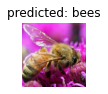

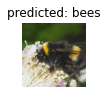

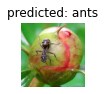

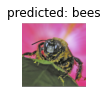

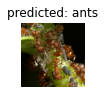

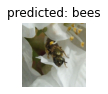

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()

**Question 10 - extracting Resnet18 features from training dataset** 

In [123]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import os
import numpy
#to get the path of all training dataset images
def image_pathfinder(data_dir):
  paths = []
  label = []
  train_path = os.path.join(data_dir, 'train')
  for foldername in os.listdir(train_path):
    infolder = os.path.join(train_path, foldername)
    for filename in os.listdir(infolder):
      if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(infolder, filename)
        paths.append(image_path)
        label.append(foldername)
  return paths,label
#feature extractor for a given image
def get_resnet18_features(image_path):
    model_ft = models.resnet18(pretrained=True)
    model_ft.eval()
    ### strip the last layer
    transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])
    # Load the image and apply the preprocessing steps
    image = Image.open(image_path)
    image = transform(image)
    # Add a batch dimension to the image
    image = image.unsqueeze(0)
    feature_extractor = torch.nn.Sequential(*list(model_ft.children())[:-1])
    features = feature_extractor(image)
    return features
  
paths,label = image_pathfinder(data_dir)
#converting tensor data into an array and getting all the features of all the images into new array 
for img_indx in range(len(paths)) :
  features = get_resnet18_features(paths[img_indx])
  features = features.detach().numpy()
  feat = []
  for i in range(len(features[0])):
    feat.append(features[0][i][0][0])
  feat1 = np.array(feat)
  if img_indx==0:
    f0 = feat1
  elif img_indx>0:
    f1=feat
    f1 = np.vstack((f0,f1))
    f0 = f1

print(f0)
print(np.shape(f0))

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[[0.05784661 0.10198422 0.5926207  ... 0.64597493 0.1496907  1.4255743 ]
 [0.09368365 0.07221743 0.20884235 ... 0.776413   0.05253863 0.46997923]
 [0.16275333 0.545219   0.24590838 ... 1.4100465  0.4487859  1.0860369 ]
 ...
 [1.0778735  0.2578849  1.3433702  ... 0.7209279  2.5106661  0.05077681]
 [0.19980158 0.01663043 0.6968077  ... 0.76410526 0.16410123 0.16943593]
 [0.19682114 0.13369972 1.0313697  ... 1.3651277  0.59392273 1.1905667 ]]
(243, 512)


Training dataset dataframe preparation

In [124]:
rev_feat = np.transpose(f0)
dict = {}
#creating a pandas dataframe and placing whole training and validation dataset including labels
for feat in range(len(rev_feat)):
  dict[f'feat{feat}'] = rev_feat[feat]
dict['target']=label
train = pd.DataFrame(dict)
train.head()

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat503,feat504,feat505,feat506,feat507,feat508,feat509,feat510,feat511,target
0,0.057847,0.101984,0.592621,2.629474,3.742041,0.203149,1.766626,0.331742,0.887183,1.843278,...,1.404550,0.036915,2.723360,3.000845,0.663738,0.130925,0.645975,0.149691,1.425574,ants
1,0.093684,0.072217,0.208842,1.689444,0.061753,0.053428,0.875035,1.083622,0.755152,0.046719,...,0.388687,0.606277,0.043683,4.295931,0.733109,0.237860,0.776413,0.052539,0.469979,ants
2,0.162753,0.545219,0.245908,0.756206,2.003058,0.859595,1.085876,0.442090,1.757214,0.897271,...,0.395055,0.725705,2.315703,1.547876,1.393872,0.157337,1.410046,0.448786,1.086037,ants
3,0.673326,0.023461,0.053681,3.211522,0.554043,0.022299,1.333923,0.054555,0.708337,0.128977,...,0.145032,0.261042,0.138592,1.865762,0.521399,0.020778,0.825617,0.000246,0.977311,ants
4,0.743734,0.484747,1.490360,2.712796,1.388940,0.054681,2.237614,0.313927,0.532537,0.484406,...,1.147499,0.054116,0.065883,0.937296,1.743930,0.274734,0.610737,0.306193,0.073325,ants


**Question 11 - Testing validation set using above prepared model**

training and validation of logistic regression model 

In [125]:
from sklearn import linear_model
df_feature = train.iloc[:,0:512]
df_target = pd.DataFrame(train['target'])
X_train_img, X_val_img, y_train_img, y_val_img = train_test_split(df_feature, np.ravel(df_target),test_size = 0.30, random_state = 101)
model_logr = linear_model.LogisticRegression(penalty='l2')
model_logr.fit(X_train_img,y_train_img)
predicted = model_logr.predict(X_val_img)
print('prediction score for img validation data is :',classification_report(y_val_img, predicted))


prediction score for img validation data is :               precision    recall  f1-score   support

        ants       0.93      0.95      0.94        39
        bees       0.94      0.91      0.93        34

    accuracy                           0.93        73
   macro avg       0.93      0.93      0.93        73
weighted avg       0.93      0.93      0.93        73



training and validation of rbf kernel SVM

In [82]:
param_grid_rbf = {'C': [0.01, 0.1, 0.4, 0.5],
                          'gamma': [0.1, 0.01],
                          'kernel': ['rbf']} 

svm_rbf = GridSearchCV(SVC(), param_grid_rbf, verbose = 3)
svm_rbf.fit(X_train_img, y_train_img)
# print best parameter after tuning
print(svm_rbf.best_params_)
grid_predictions_rbf = svm_rbf.predict(X_val_img)
# print classification report
print(classification_report(y_val_img, grid_predictions_rbf)) 
print(svm_rbf.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.529 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.529 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;,

training an validation of random forest classifier 

In [83]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
rnf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid, verbose=3)
rnf.fit(X_train_img, y_train_img)
y_pred  = rnf.predict(X_val_img)
print(rnf.best_estimator_)
print(rnf.best_params_)
print(classification_report(y_pred, y_val_img))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.941 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.882 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.971 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.971 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.971 total time=   0.2s
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.941 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.912 total time=   0.3s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.971 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=1.000 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.971 total t

preparing test dataset from validation image set

In [84]:
#same reasons as stated during training
def image_pathfinder(data_dir):
  paths = []
  label = []
  test_path = os.path.join(data_dir, 'val')
  for foldername in os.listdir(test_path):
    infolder = os.path.join(test_path, foldername)
    for filename in os.listdir(infolder):
      if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(infolder, filename)
        paths.append(image_path)
        label.append(foldername)
  return paths,label

paths,label = image_pathfinder(data_dir)

for img_indx in range(len(paths)) :
  features = get_resnet18_features(paths[img_indx])
  features = features.detach().numpy()
  feat = []
  for i in range(len(features[0])):
    feat.append(features[0][i][0][0])
  feat1 = np.array(feat)
  if img_indx==0:
    f0 = feat1
  elif img_indx>0:
    f1=feat
    f1 = np.vstack((f0,f1))
    f0 = f1

rev_feat = np.transpose(f0)
dict = {}
for feat in range(len(rev_feat)):
  dict[f'feat{feat}'] = rev_feat[feat]
dict['target']=label
val = pd.DataFrame(dict)
val.head()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat503,feat504,feat505,feat506,feat507,feat508,feat509,feat510,feat511,target
0,0.649819,0.007461,0.000000,2.629223,0.151856,0.000000,0.604023,0.026032,1.037432,0.448468,...,0.338612,0.197420,0.981604,0.045622,1.287052,0.065003,2.620254,0.040109,0.061314,ants
1,0.935581,1.005446,1.614896,2.664279,0.488427,1.005452,1.707230,0.539283,1.376720,0.444412,...,0.366851,1.727146,1.206915,2.257951,0.636307,0.267802,0.651311,0.500332,0.159054,ants
2,0.740921,0.635113,0.497056,2.738526,2.066871,0.417279,2.771435,0.584003,1.050692,1.143386,...,0.090939,0.008562,0.131127,2.539761,0.325459,0.231328,0.919331,0.037073,0.473358,ants
3,0.536385,1.994487,1.432266,1.634152,4.795194,0.019936,1.724445,0.931812,1.134531,0.081806,...,0.332782,0.048363,0.310537,2.423959,1.107509,1.111834,1.201869,0.026175,0.143382,ants
4,0.393239,0.329000,2.167636,0.344592,1.690333,0.694787,2.289551,0.879581,0.672499,0.302577,...,0.007259,0.032164,0.221842,2.508730,0.233450,0.000000,0.082084,0.066348,1.057789,ants


testing of all the models:

In [85]:
val.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Columns: 513 entries, feat0 to target
dtypes: float32(512), object(1)
memory usage: 307.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Columns: 513 entries, feat0 to target
dtypes: float32(512), object(1)
memory usage: 488.0+ KB


In [86]:
#final testing of all the models
df_feature = val.iloc[:,0:512]
df_target = pd.DataFrame(val['target'])

predicted = model_logr.predict(df_feature)
print('prediction score for img testing dataset for logistic regression is :',classification_report(df_target, predicted))

predicted = svm_rbf.predict(df_feature)
print('prediction score for img testing dataset for svm rbf kernel is :',classification_report(df_target, predicted))

predicted = rnf.predict(df_feature)
print('prediction score for img testing dataset for random forest classifier is :',classification_report(df_target, predicted))

prediction score for img testing dataset for logistic regression is :               precision    recall  f1-score   support

        ants       0.94      0.97      0.96        70
        bees       0.98      0.95      0.96        83

    accuracy                           0.96       153
   macro avg       0.96      0.96      0.96       153
weighted avg       0.96      0.96      0.96       153

prediction score for img testing dataset for svm rbf kernel is :               precision    recall  f1-score   support

        ants       1.00      0.34      0.51        70
        bees       0.64      1.00      0.78        83

    accuracy                           0.70       153
   macro avg       0.82      0.67      0.65       153
weighted avg       0.81      0.70      0.66       153

prediction score for img testing dataset for random forest classifier is :               precision    recall  f1-score   support

        ants       0.94      0.96      0.95        70
        bees       0.96    

Among the three logisctic regression perofrm better than svm and random forest classifier.

# Question 12 - Final learnings and References:




#    Things i have learned from objective 1:

* *  how to clean dataset i.e removing columns with high missing values greater than 10% and removing columns which has high correlation among them and rest of the columns which have less missing values we impute them using linear regression with other column which has significant correlation with target column.
* *  above dataset had multiclass and a binary class we choose metrics based on them, Linear SVM does perform good in training dataset but gives low performance in testing when compared to neural network or random forest classifier.
* *  Five cross validation is used to estimate the skill of a machine learning model on unseen data. i.e to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.
* *   Many features can be removed from dataset because many features have quite low variance, Overall i learnt how to use inbuilt models for training and testing purposes.



#  Things i have learned from objective 2:
* *  A pretrained ConvNet can be used as fixed feature extractor and this extracted Resnet18 features from a image training dataset can be helpful in training a model this can be done using pytorch, i have learned to create a dictionary object in python and prepare a dataframe which consist of both features and label of particular dataset, among three Logistic regression performed best when compared to rbf kernel svm and random forest classifier.











**Reference used:**

*  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
*   https://www.analyticsvidhya.com/blog/2021/08/python-tutorial-working-with-csv-file-for-data-science/

*   https://www.analyticsvidhya.com/blog/2021/08/python-tutorial-working-with-csv-file-for-data-science/
*  https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/

*   https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5#:~:text=What%20are%20Balanced%20and%20Imbalanced%20Datasets%3F&text=Consider%20Orange%20color%20as%20a,positive%20values%20and%20negative%20values.
*  https://scikit-learn.org/stable/modules/impute.html

*   https://sparkbyexamples.com/numpy/numpy-split-array/#:~:text=You%20can%20use%20numpy.,wise%20(axis%3D0)%20.

*   https://www.digitalocean.com/community/tutorials/update-rows-and-columns-python-pandas

*  https://www.geeksforgeeks.org/numpy-vstack-in-python/
*   https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428#:~:text=Most%20commonly%20used%20metrics%20for,Average%20Accuracy%2C%20Log%2Dloss.


* https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167


*   https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

*   https://towardsdatascience.com/the-importance-of-k-fold-cross-validation-for-model-prediction-in-machine-learning-4709d3fed2ef#:~:text=Cross%2Dvalidation%20is%20usually%20used,or%20using%20a%20holdout%20dataset.
*   https://towardsdatascience.com/cross-validation-and-grid-search-efa64b127c1b

*   https://www.digitalocean.com/community/tutorials/create-subset-of-python-dataframe

*   https://www.geeksforgeeks.org/hyperparameter-tuning-using-gridsearchcv-and-kerasclassifier/

*   https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/#:~:text=Units%20are%20one%20of%20the,Activation

*  https://stackoverflow.com/questions/53838304/format-of-adding-hidden-layers-in-keras

*   https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
*  https://stackoverflow.com/questions/62326735/metrics-f1-warning-zero-division


*   https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/


*   https://www.geeksforgeeks.org/python-program-to-find-second-largest-number-in-a-list/


* https://www.geeksforgeeks.org/how-to-find-the-index-of-value-in-numpy-array/


*   https://stevenmiller888.github.io/mind-how-to-build-a-neural-network/

*   https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/?ref=rp

*  https://towardsdatascience.com/mastering-random-forests-a-comprehensive-guide-51307c129cb1#:~:text=Generally%2C%20we%20go%20with%20a,vary%20between%20each%20decision%20tree.

*   https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e#:~:text=You%20can%20get%20the%20feature,feature%20towards%20your%20output%20variable.

*  https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html

*  https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec

*  https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/

*  https://stackoverflow.com/questions/55083642/extract-features-from-last-hidden-layer-pytorch-resnet18
*  https://deeplizard.com/learn/video/AiyK0idr4uM#:~:text=The%20shape%20of%20a%20tensor%20gives%20us%20the,each%20axis%20of%20the%20tensor.&text=This%20allows%20us%20to%20see,tensor%20are%20the%20same%20thing.


*   https://www.geeksforgeeks.org/python-pil-image-open-method/


*   https://www.geeksforgeeks.org/python-os-listdir-method/


*   https://www.statology.org/numpy-count/


*   https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/#:~:text=The%20number%20of%20epochs%20can,value%20between%20one%20and%20infinity.


*   https://dataintegration.info/how-to-grid-search-hyperparameters-for-deep-learning-models-in-python-with-keras


*   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

*   https://www.w3schools.com/python/python_ml_logistic_regression.asp

*   https://sparkbyexamples.com/numpy/use-numpy-vstack-in-python/#:~:text=vstack()%20function%20is%20used,vstack()%2C%20and%20hstack().

*   https://sparkbyexamples.com/pandas/pandas-append-list-as-a-row-to-dataframe/#:~:text=Using%20loc%5B%5D%20to%20Append,using%20len(df)%20function.
*   https://www.tutorialspoint.com/how-to-convert-a-numpy-ndarray-to-a-pytorch-tensor-and-vice-versa


*  https://medium.com/jun94-devpblog/pytorch-1-transform-imagefolder-dataloader-7f75f0a460c0


*   https://www.geeksforgeeks.org/python-dictionary/















